In [59]:
from influxdb import InfluxDBClient
from influxdb import DataFrameClient
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import numpy as np

In [60]:
client = InfluxDBClient('192.168.100.155',8086,'schmuddel','schmuddel','schmuddel')
query = 'SELECT mean("pressure") AS "mean_pressure", mean("flow") AS "mean_flow"  FROM "schmuddel"."autogen"."schmuddel" WHERE time > now()-6h GROUP BY time(5s) fill(previous)'

In [61]:
res_points = list(client.query(query).get_points())
df = pd.DataFrame(res_points)

In [88]:
#diffflow = df.mean_flow.diff()
#df['diffflow']= diffflow
#df['cumsum_flow'] = df.diffflow.cumsum()
df.time = pd.to_datetime(df.time, utc =True)
df["flow_lmin"] = df.mean_flow*50/1024


In [95]:
df["duration"] = df.time.diff()
df.duration = df.duration.dt.total_seconds()
df

,time,mean_pressure,mean_flow,duration,volume,Vsum,flow_lmin,volume_l,Vsum_l
0,2021-11-17 10:49:45+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
1,2021-11-17 10:49:50+00:00,NaN,NaN,5.0,NaN,NaN,NaN,NaT,NaN
2,2021-11-17 10:49:55+00:00,NaN,NaN,5.0,NaN,NaN,NaN,NaT,NaN
3,2021-11-17 10:50:00+00:00,NaN,NaN,5.0,NaN,NaN,NaN,NaT,NaN
4,2021-11-17 10:50:05+00:00,NaN,NaN,5.0,NaN,NaN,NaN,NaT,NaN
...,...,...,...,...,...,...,...,...,...
4316,2021-11-17 16:49:25+00:00,67.20,325.20,5.0,2.710000e+10,5.263383e+13,15.878906,0 days 00:00:01.323242187,5.263383e+13
4317,2021-11-17 16:49:30+00:00,67.20,325.80,5.0,2.715000e+10,5.266098e+13,15.908203,0 days 00:00:01.325683593,5.266098e+13
4318,2021-11-17 16:49:35+00:00,67.80,327.20,5.0,2.726667e+10,5.268825e+13,15.976562,0 days 00:00:01.331380208,5.268825e+13
4319,2021-11-17 16:49:40+00:00,69.20,332.40,5.0,2.770000e+10,5.271595e+13,16.230469,0 days 00:00:01.352539062,5.271595e+13


In [97]:


df["volume_l"] = df.flow_lmin*df.duration/60
df["Vsum_l"] = df.volume.cumsum()
df

,time,mean_pressure,mean_flow,duration,volume,Vsum,flow_lmin,volume_l,Vsum_l
0,2021-11-17 10:49:45+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-11-17 10:49:50+00:00,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN
2,2021-11-17 10:49:55+00:00,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN
3,2021-11-17 10:50:00+00:00,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN
4,2021-11-17 10:50:05+00:00,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
4316,2021-11-17 16:49:25+00:00,67.20,325.20,5.0,2.710000e+10,5.263383e+13,15.878906,1.323242,5.263383e+13
4317,2021-11-17 16:49:30+00:00,67.20,325.80,5.0,2.715000e+10,5.266098e+13,15.908203,1.325684,5.266098e+13
4318,2021-11-17 16:49:35+00:00,67.80,327.20,5.0,2.726667e+10,5.268825e+13,15.976562,1.331380,5.268825e+13
4319,2021-11-17 16:49:40+00:00,69.20,332.40,5.0,2.770000e+10,5.271595e+13,16.230469,1.352539,5.271595e+13


In [80]:
#dfa =df.filter(items=[ 'mean_pressure', 'mean_flow'])
fig = px.line(df, x='time', y=["mean_flow","mean_pressure", "Vsum"])
fig.update_xaxes(rangeslider_visible=True)
fig.show()
# px.line(data_frame=dfa)


In [25]:
px.scatter(df, x="mean_pressure", y="mean_flow")

<AxesSubplot:xlabel='mean_pressure', ylabel='mean_flow'>

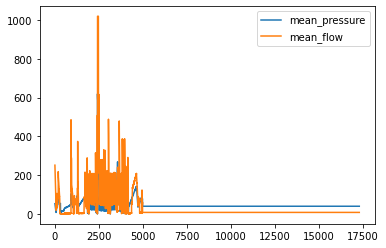

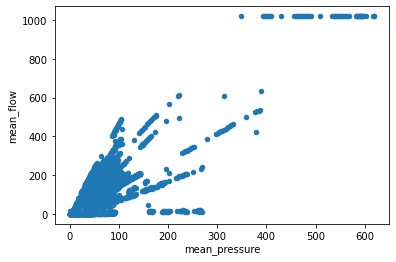

In [10]:
df.plot()
df.plot(x="mean_pressure", y="mean_flow",kind='scatter')  

In [1]:
dff =df.filter(items=[ 'time','mean_pressure', 'mean_flow'])
dff.fillna(0)

NameError: name 'df' is not defined

In [74]:
dff.dtypes

likes             object
mean_flow        float64
mean_pressure    float64
dtype: object

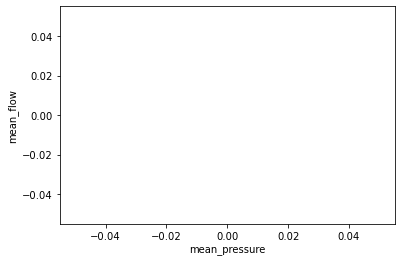

In [73]:
ax = dff.plot.scatter(x="mean_pressure", y="mean_flow",c="likes", colormap='viridis')

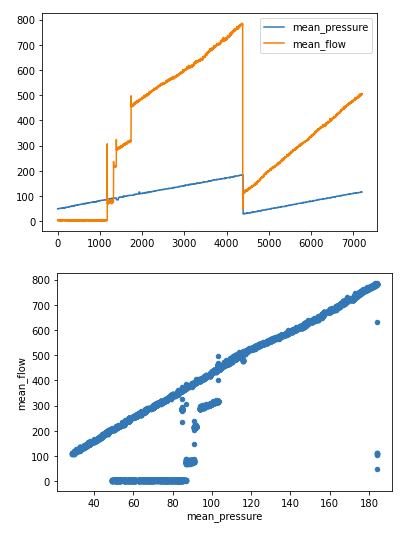
some randomness: flow is sometime rising linear with pressure